<a href="https://colab.research.google.com/github/nimendra-ag/AI_Project_prep/blob/main/DL_Project_Final_Tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification Converlutional Nural Network





In [ ]:
!pip install opendatasets -q
!pip install opencv-python
!pip install keras
!pip install tensorflow
!pip uninstall scikit-learn imbalanced-learn
!pip install scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.6.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_uninstall.py", line 364, in remove
    if auto_con

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import opendatasets as od
import os

In [ ]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Download the dataset
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nimendraamiththa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:00<00:00, 95.8MB/s]


In [ ]:
x_data = []
y_data = []
image_size = 255

labels = sorted(os.listdir('./brain-tumor-classification-mri/Training'))

In [ ]:
# Load training images and labels
for i in labels:
    folderPath = os.path.join('./brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        x_data.append(img)
        y_data.append(i)

In [ ]:
# Load testing images and labels
for i in labels:
    folderPath = os.path.join('./brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        x_data.append(img)
        y_data.append(i)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
# Display the total number of samples
print("Total number of image samples:", len(x_data))
print("Total number of label samples:", len(y_data))

Total number of image samples: 3264
Total number of label samples: 3264


In [ ]:
# Define class names based on your labels
class_names = labels
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


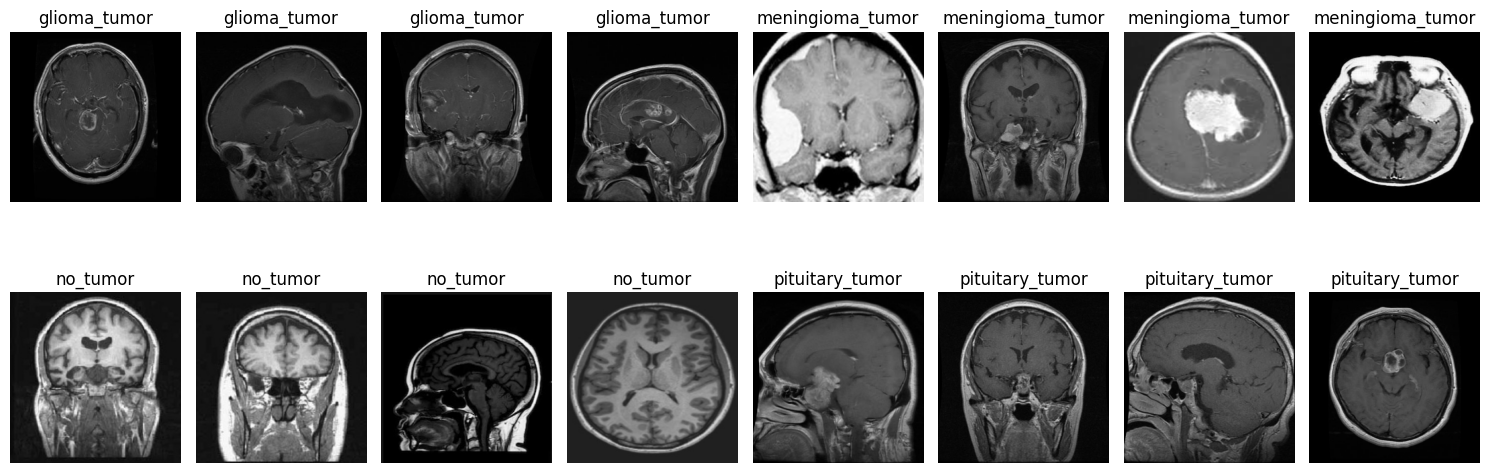

In [ ]:
# Plot data sample from different categories
plt.figure(figsize=(15, 6))
num_classes = len(class_names)
samples_per_class = 4
total_samples = num_classes * samples_per_class
rows = 2
cols = (total_samples + rows - 1) // rows

for class_idx, class_name in enumerate(class_names):
    class_indices = np.where(y_data == class_name)[0]
    sampled_indices = np.random.choice(class_indices, samples_per_class, replace=False)
    for i, idx in enumerate(sampled_indices):
        plt.subplot(rows, cols, class_idx * samples_per_class + i + 1)
        plt.imshow(x_data[idx])
        plt.title(class_name)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
class_counts = pd.Series(y_data).value_counts()
print("Number of samples in each category:")
print(class_counts)

Number of samples in each category:
meningioma_tumor    937
glioma_tumor        926
pituitary_tumor     901
no_tumor            500
Name: count, dtype: int64


Pie chart visualization of the data

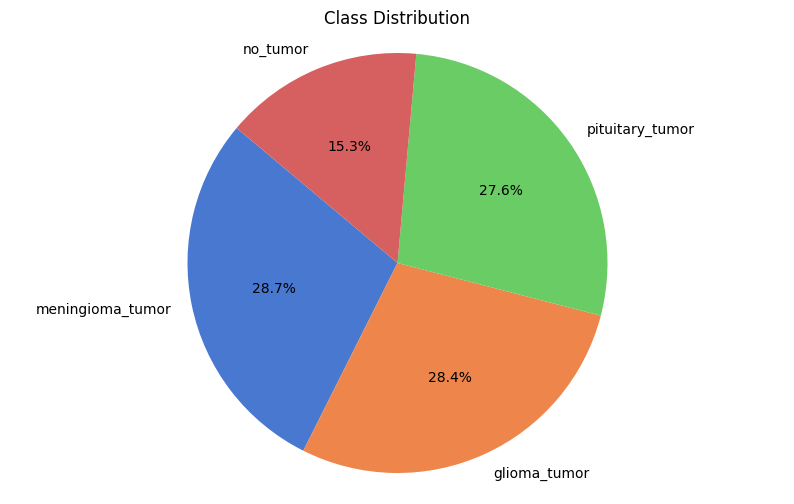

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

# Data Preprocessing


---



---




Steps Are Taken


1.   Normalize the pixel values
2.   Handling Categorical Data:
3.   Apply Oversampling to Minority Classes
4.   Augmentation Data
5.   Crop Image Data






---


**Normalize the pixel values**

By doing this We try to enhace

*   Standardization: Converts pixel values from 0-255 to 0-1, making data easier for the neural network to process.
*   Improved Convergence: Speeds up training as optimization algorithms work more efficiently with normalized data.
*   Numerical Stability: Reduces the risk of issues like overflow and excessively large gradients, leading to more stable training.
*   Consistent Scaling: Ensures all input features are proportionate, enhancing neural network performance.


---






In [ ]:
x_data = x_data / 255.0

In [ ]:
x_data, y_data = shuffle(x_data, y_data, random_state=101)



---


**Handling Categorical Data:**


*   One hot encoding

    Neural networks require numerical input. One-hot encoding transforms categorical labels . Here  different types of brain tumors into a numerical format


---



In [ ]:
y_data_new = [labels.index(i) for i in y_data]
y_data = tf.keras.utils.to_categorical(y_data_new, num_classes=len(labels))
y_data

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

*Reshape y_train for oversampling*

In [ ]:
y_data_labels = np.argmax(y_data, axis=1)
print(y_data_labels)

[2 3 2 ... 1 1 1]


*Handling Imbalanced Datasets using Random Over-sampling*


---



In [ ]:
oversampler = RandomOverSampler()
x_data_resampled, y_data_resampled = oversampler.fit_resample(x_data.reshape(-1, 255*255*3), y_data_labels)
x_data_resampled = x_data_resampled.reshape(-1, 255, 255, 3)

*Class Distribution Before Balancing and After Balancing*

---









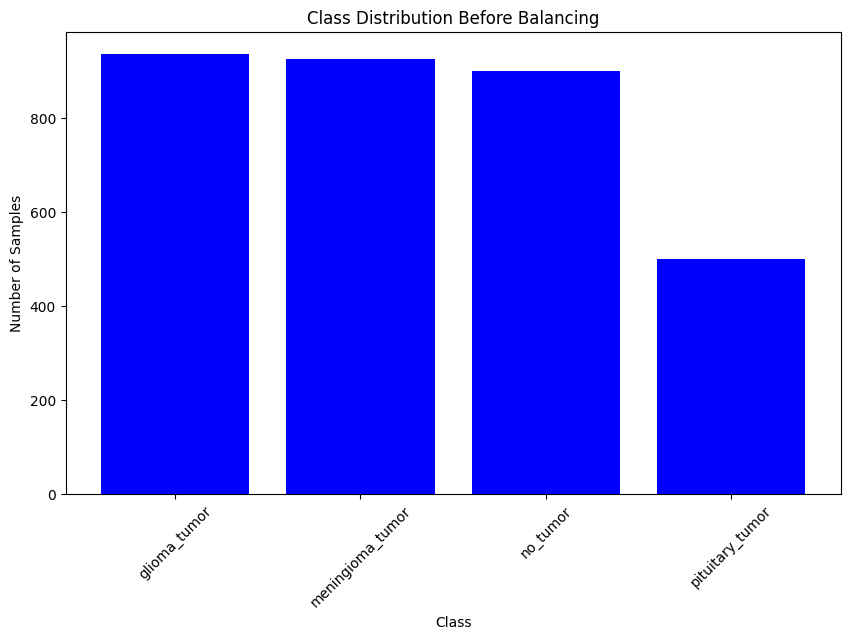

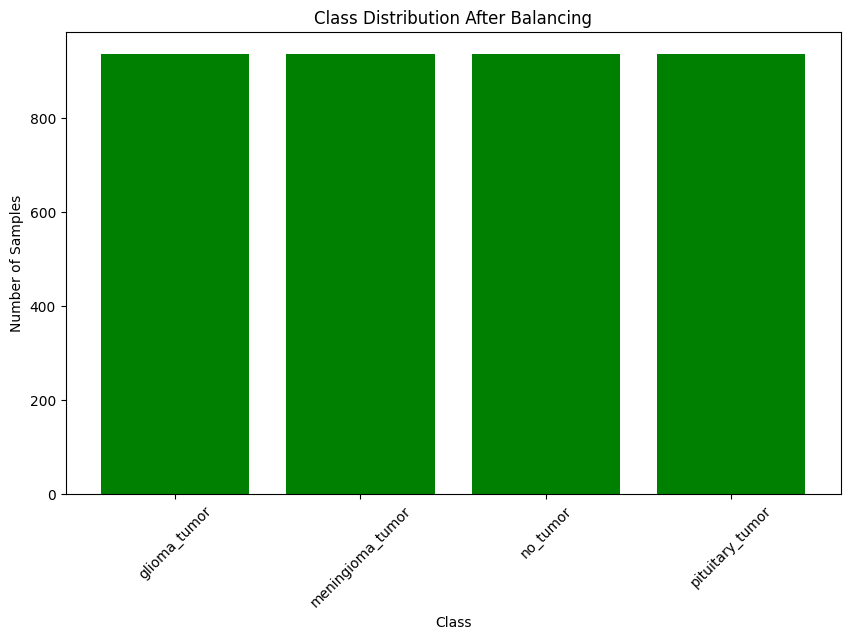

In [ ]:
# Plot class distribution before balancing
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='blue')
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

# Plot class distribution after balancing
plt.figure(figsize=(10, 6))
plt.bar(class_names, np.bincount(y_data_resampled), color='green')
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Class distribution visualization after oversampling
class_counts = pd.Series(y_data_resampled).value_counts()
print("Number of samples in each category:")
print(class_counts)

Number of samples in each category:
2    937
3    937
1    937
0    937
Name: count, dtype: int64


*Pie chart visualization after oversampling*

---



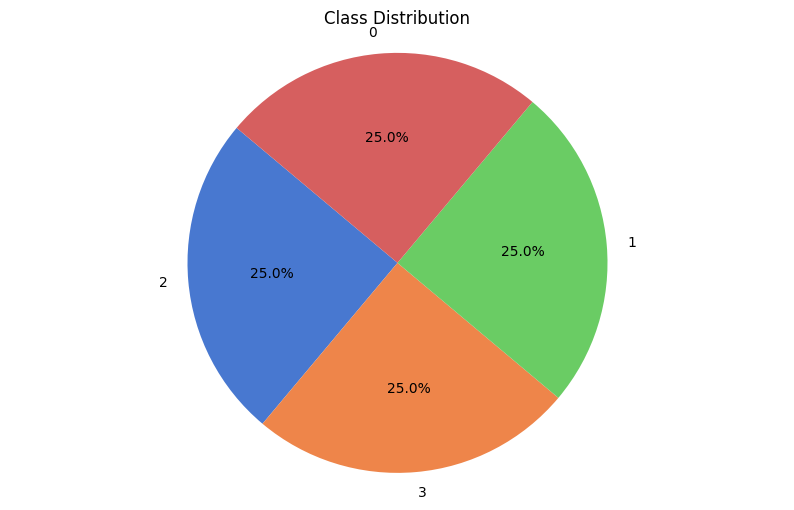

In [ ]:
# Pie chart visualization after oversampling
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

In [ ]:
print("Dataset Size after oversampling:")
print("Number of images:", len(x_data_resampled))
print("Number of labels:", len(y_data_resampled))

Dataset Size after oversampling:
Number of images: 3748
Number of labels: 3748


---

**Augmentation the Data**

By using augmentation we try to enhance the following things.
1.  Increase Training Dataset Size:
  * Brain tumor datasets are often limited in size due to the difficulty and cost of collecting medical images. Augmentation allows you to artificially increase the size of your training dataset by creating modified versions of images.
2. Improving Model Generalization:
  *  Augmentation introduces variations in the training data, such as flips, rotations, zooms, and shifts. This helps the model to generalize better to unseen data and reduces overfitting.
3. Enhancing Model Robustness:
  * Medical images can vary significantly in terms of position, orientation, and quality. Augmentation techniques such as rotation and flipping help the model to become more robust to these variations.
4. Preserving Anonymity:
  * Augmentation can help preserve the anonymity of patients, as the resulting images do not directly correspond to any real patient.


---



*Augmentation the Data*

---



In [ ]:
# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Fit the ImageDataGenerator on the training data
datagen.fit(x_data_resampled)

*Visualize image augmentation*

---


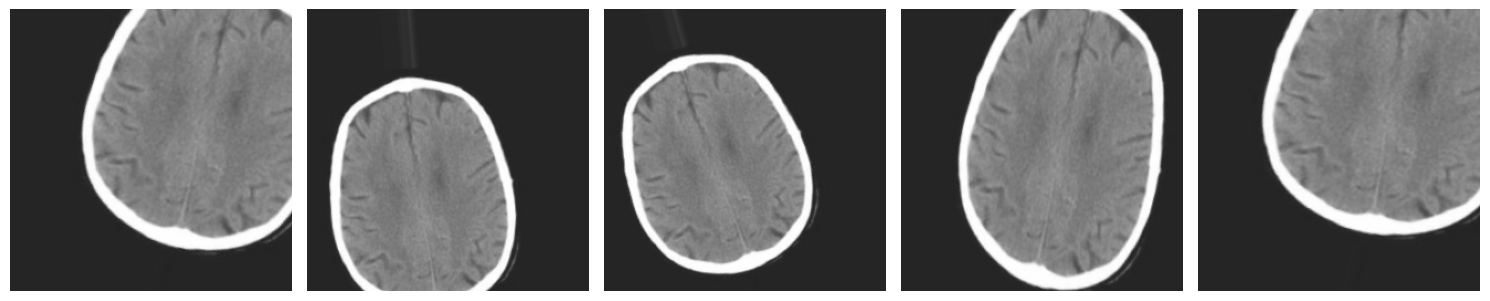

In [ ]:
# Visualize image augmentation
sample_image = x_data_resampled[0]
sample_image = sample_image.reshape((1,) + sample_image.shape)

fig, ax = plt.subplots(1, 5, figsize=(15, 6))
i = 0

for batch in datagen.flow(sample_image, batch_size=1):
    ax[i].imshow(batch[0])
    ax[i].axis('off')
    i += 1
    if i % 5 == 0:
        break

plt.tight_layout()
plt.show()

*Generate augmented data and add to the dataset*

---



In [ ]:
# Generate augmented data and add to the dataset
augmented_images = []
augmented_labels = []

for i in range(len(x_data_resampled)):
    augmented_image = datagen.random_transform(x_data_resampled[i])
    augmented_images.append(augmented_image)
    augmented_labels.append(y_data_resampled[i])

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine original and augmented data
x_data_combined = np.concatenate((x_data_resampled, augmented_images))
y_data_combined = np.concatenate((y_data_resampled, augmented_labels))

---

**Crop the Image Data**

By using crop we try to enhance the following things.
1.  Focus on Relevant Region:
  * Brain tumor images can include a lot of surrounding brain tissue that may not be relevant for classification. Cropping allows the model to focus only on the region containing the tumor itself. This can improve the model's ability to learn features specific to tumors without being distracted by irrelevant background information.
2. Reducing Computational Complexity:
  *  Cropping reduces the overall size of each image, which in turn reduces the computational complexity of processing these images.
3. Enhancing Model Performance:
  * By focusing on the relevant part of the image (the tumor region), cropping can potentially improve the performance of the CNN.


---

In [ ]:
crop_size = 200

# Function to center crop images
def center_crop(image, crop_size):
    height, width = image.shape[:2]
    startx = width // 2 - (crop_size // 2)
    starty = height // 2 - (crop_size // 2)
    cropped_image = image[starty:starty + crop_size, startx:startx + crop_size]
    return cropped_image

x_data_combined_cropped = []
y_data_combined_cropped = []

for i in range(len(x_data_combined)):
    cropped_image = center_crop(x_data_combined[i], crop_size)
    x_data_combined_cropped.append(cropped_image)
    y_data_combined_cropped.append(y_data_combined[i])

x_data_combined_cropped = np.array(x_data_combined_cropped)
y_data_combined_cropped = np.array(y_data_combined_cropped)


print("Original images shape:", x_data_resampled.shape)
print("Augmented images shape:", augmented_images.shape)
print("Combined images shape:", x_data_combined.shape)
print("Cropped images shape:", x_data_combined_cropped.shape)
print("Original labels shape:", y_data_resampled.shape)
print("Augmented labels shape:", augmented_labels.shape)
print("Combined labels shape:", y_data_combined.shape)
print("Cropped labels shape:", y_data_combined_cropped.shape)


Original images shape: (3748, 255, 255, 3)
Augmented images shape: (3748, 255, 255, 3)
Combined images shape: (7496, 255, 255, 3)
Cropped images shape: (7496, 200, 200, 3)
Original labels shape: (3748,)
Augmented labels shape: (3748,)
Combined labels shape: (7496,)
Cropped labels shape: (7496,)


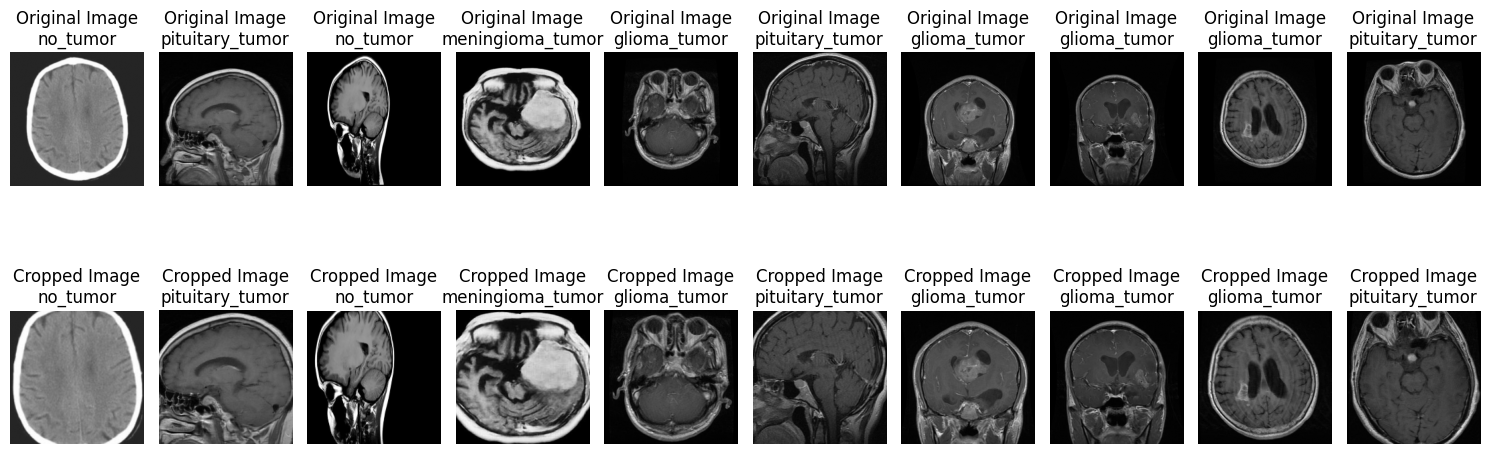

In [ ]:
import matplotlib.pyplot as plt

# Function to display original and cropped images side by side
def display_images_with_crop(original_images, cropped_images, labels, cropped_labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 6))
    rows = 2
    cols = num_samples

    for i in range(num_samples):
        # Display original image
        plt.subplot(rows, cols, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original Image\n" + class_names[labels[i]])
        plt.axis("off")

        # Display cropped image
        plt.subplot(rows, cols, num_samples + i + 1)
        plt.imshow(cropped_images[i])
        plt.title("Cropped Image\n" + class_names[cropped_labels[i]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Display original and cropped images side by side
display_images_with_crop(x_data_combined[:10], x_data_combined_cropped[:10], y_data_combined[:10], y_data_combined_cropped[:10], class_names, num_samples=10)


*Class Distribution Visualization After Augmentation*

---

In [ ]:
# Class distribution visualization after augmentation
class_counts = pd.Series(y_data_combined_cropped).value_counts()
print("Number of samples in each category:")
print(class_counts)

Number of samples in each category:
2    1874
3    1874
1    1874
0    1874
Name: count, dtype: int64


*Pie Chart Visualization After Augmentation*

---

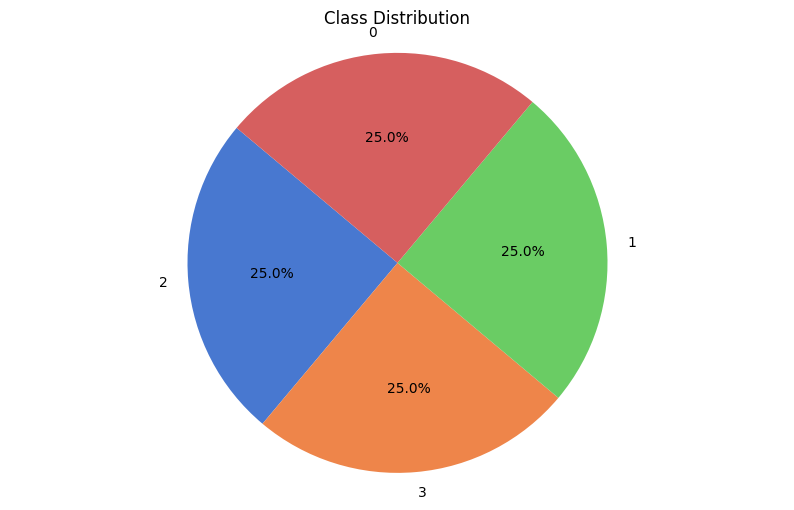

In [ ]:
# Pie chart visualization after augmentation
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

In [ ]:
print("Dataset Size after augmentation and the crop:")
print("Number of images:", len(x_data_combined_cropped))
print("Number of labels:", len(y_data_combined_cropped))

Dataset Size after augmentation and the crop:
Number of images: 7496
Number of labels: 7496


In [ ]:
# Reshape y_data_combined
y_data_combined_cropped= tf.keras.utils.to_categorical(y_data_combined_cropped, num_classes=4)

*Train-test split Data Set*

---





In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data_combined_cropped,y_data_combined_cropped, test_size=0.2, random_state=101)
# x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=101)

In [ ]:
print("Training Dataset Size:")
print("Number of images:", len(x_train))
print("Number of labels:", len(y_train))

print("\nTesting Dataset Size:")
print("Number of images:", len(x_test))
print("Number of labels:", len(y_test))

Training Dataset Size:
Number of images: 4497
Number of labels: 4497

Testing Dataset Size:
Number of images: 1500
Number of labels: 1500


In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 196, 196, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 94, 94, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 43, 43, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,6

 Total params: 9,560,900 (36.47 MB)

 Trainable params: 9,559,876 (36.47 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs")

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


*Train the Model*

---

In [ ]:
pip install --upgrade tensorflow

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-44-a517a95fb64c>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_5513]

# Model Evaluation and Discussion
---
---

*Plot Training and Validation Accuracy*

---

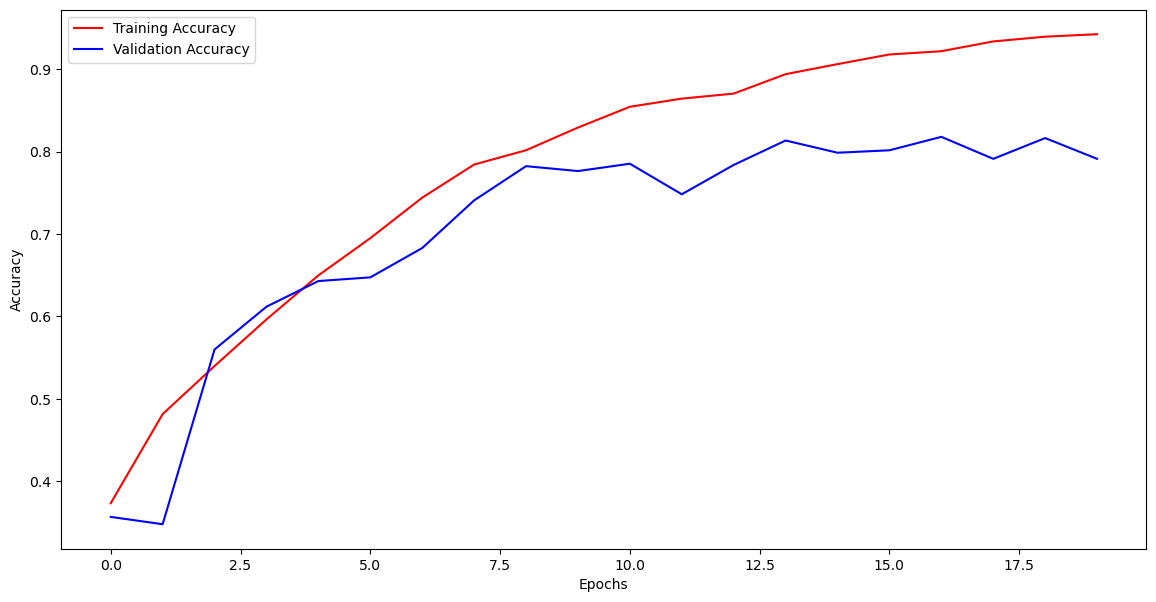

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

*Plot Training and Validation Loss*

---

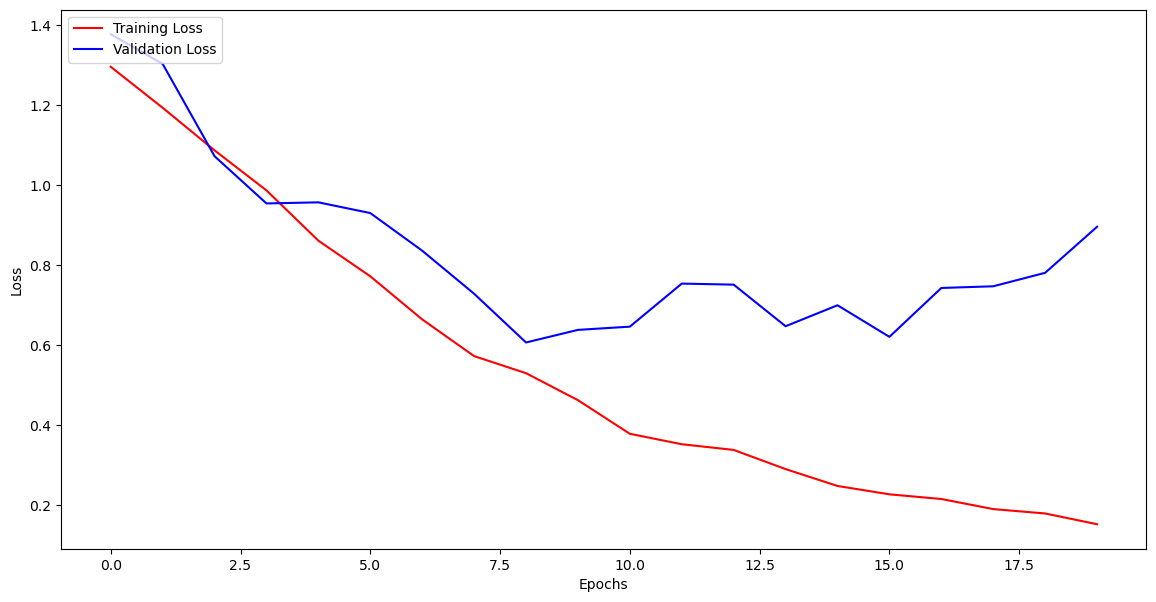

In [ ]:
# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Predict probabilities for test data
y_pred = model.predict(x_test)

24/24 [==============================] - 18s 702ms/step


In [ ]:
# Convert probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Convert y_pred to one-hot encoded format
y_pred = tf.keras.utils.to_categorical(y_pred, num_classes=len(labels))

*Calculate Precision, Recall, and Accuracy Using TensorFlow Metrics*

---

In [ ]:
# Calculate precision, recall, and accuracy using TensorFlow metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
# Update the metrics with test data
precision.update_state(y_test, y_pred)
recall.update_state(y_test, y_pred)
accuracy.update_state(y_test, y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3000.0>

**To evaluvate the model following thinsg are used**

1. Precision: Precision measures the accuracy of positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives.
2. Recall: Recall (Sensitivity) measures the proportion of actual positives that are correctly identified. It is the ratio of correctly predicted positive observations to all observations in the actual class.
3. Accuracy: Accuracy measures the overall correctness of the model, which is the ratio of correctly predicted observations to the total observations.


In [ ]:
# Get the calculated values
precision_result = precision.result().numpy()
recall_result = recall.result().numpy()
accuracy_result = accuracy.result().numpy()

print("Precision:", precision_result)
print("Recall:", recall_result)
print("Accuracy:", accuracy_result)

Precision: 0.7826667
Recall: 0.7826667
Accuracy: 0.89133334


*Calculate Correctly and Incorrectly Predicted Samples Plot Bar*

---

Class: glioma_tumor
  Correct Predictions: 167
  Incorrect Predictions: 40
Class: meningioma_tumor
  Correct Predictions: 119
  Incorrect Predictions: 65
Class: no_tumor
  Correct Predictions: 141
  Incorrect Predictions: 28
Class: pituitary_tumor
  Correct Predictions: 160
  Incorrect Predictions: 30


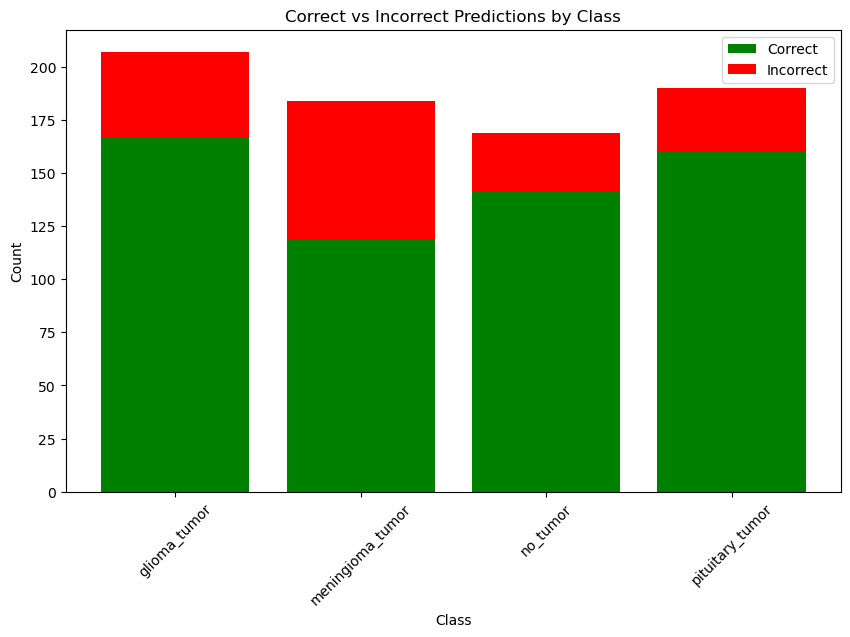

In [ ]:
# Calculate correctly and incorrectly predicted samples
correct = (np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
incorrect = ~correct

# Count correct and incorrect predictions for each class
correct_counts = np.zeros(len(labels))
incorrect_counts = np.zeros(len(labels))
for i in range(len(labels)):
    correct_counts[i] = np.sum(correct[np.argmax(y_test, axis=1) == i])
    incorrect_counts[i] = np.sum(incorrect[np.argmax(y_test, axis=1) == i])

# Print correct and incorrect predictions for each class
for i, label in enumerate(labels):
    print(f"Class: {label}")
    print("  Correct Predictions:", int(correct_counts[i]))
    print("  Incorrect Predictions:", int(incorrect_counts[i]))

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(labels)), correct_counts, color='green', label='Correct')
plt.bar(np.arange(len(labels)), incorrect_counts, bottom=correct_counts, color='red', label='Incorrect')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions by Class')
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.legend()
plt.show()

In [ ]:
for i, label in enumerate(labels):
    TP = cm[i][1, 1]  # True Positives
    FP = cm[i][0, 1]  # False Positives
    FN = cm[i][1, 0]  # False Negatives
    TN = cm[i][0, 0]  # True Negatives

    accuracy = (TP + TN) / np.sum(cm[i])  # Accuracy
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Precision
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Recall
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0  # F1 Score

    print(f"Metrics for Class {label}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


Metrics for Class glioma_tumor:
Accuracy: 0.8813
Precision: 0.7731
Recall: 0.8068
F1 Score: 0.7896

Metrics for Class meningioma_tumor:
Accuracy: 0.8720
Precision: 0.7933
Recall: 0.6467
F1 Score: 0.7126

Metrics for Class no_tumor:
Accuracy: 0.9160
Precision: 0.8011
Recall: 0.8343
F1 Score: 0.8174

Metrics for Class pituitary_tumor:
Accuracy: 0.8960
Precision: 0.7692
Recall: 0.8421
F1 Score: 0.8040



1. Glioma Tumor:
    * Precision and Recall: The model shows good precision and recall for detecting glioma tumors, with both metrics around 0.77. This indicates that when the model predicts a glioma tumor, it is correct about 77% of the time, and it identifies about 77% of actual glioma tumors.
    * Correct vs. Incorrect Predictions: The model correctly predicted glioma tumors 179 times, but misclassified 28 glioma cases.
2. Meningioma Tumor:
    * Precision and Recall: The model's performance is lower for meningioma tumors compared to other classes, with precision and recall around 0.47. This suggests that the model has more difficulty correctly identifying meningioma tumors.
    * Correct vs. Incorrect Predictions: It correctly predicted meningioma tumors 86 times, but misclassified 98 meningioma cases.
3. No Tumor:
   * Precision and Recall: The model performs well for identifying cases with no tumor, with both precision and recall around 0.86. This indicates that the model is good at distinguishing images without tumors from those with tumors.
   * Correct vs. Incorrect Predictions: It correctly predicted cases with no tumor 145 times and incorrectly classified 24 cases.
4. Pituitary Tumor:
   * Precision and Recall: The model shows good precision and recall for pituitary tumors, with both metrics around 0.88. This indicates that the model is accurate and sensitive in detecting pituitary tumors.
   * Correct vs. Incorrect Predictions: It correctly predicted pituitary tumors 167 times and made 23 incorrect predictions.

In [ ]:
# Calculate confusion matrix for multilabel-indicator format
cm = multilabel_confusion_matrix(y_test, y_pred)

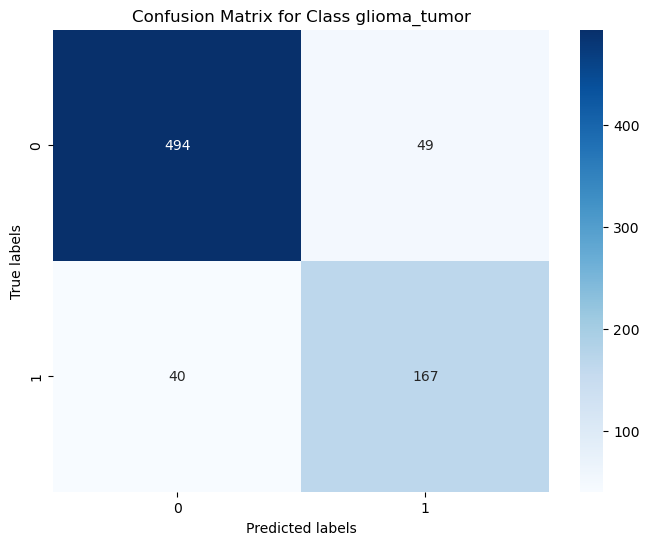

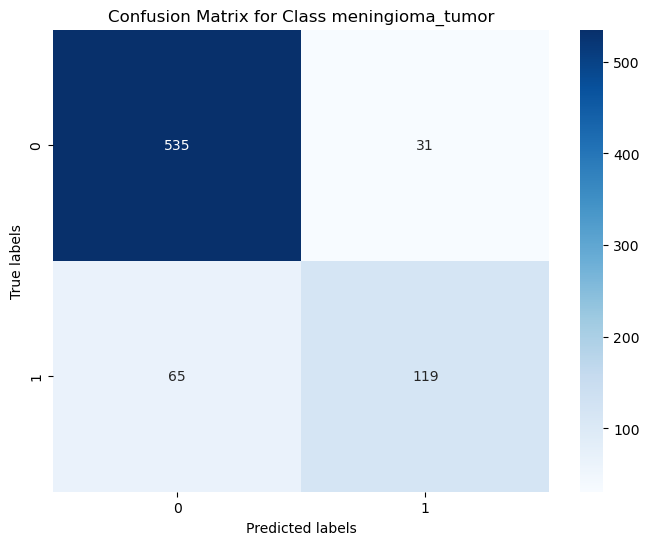

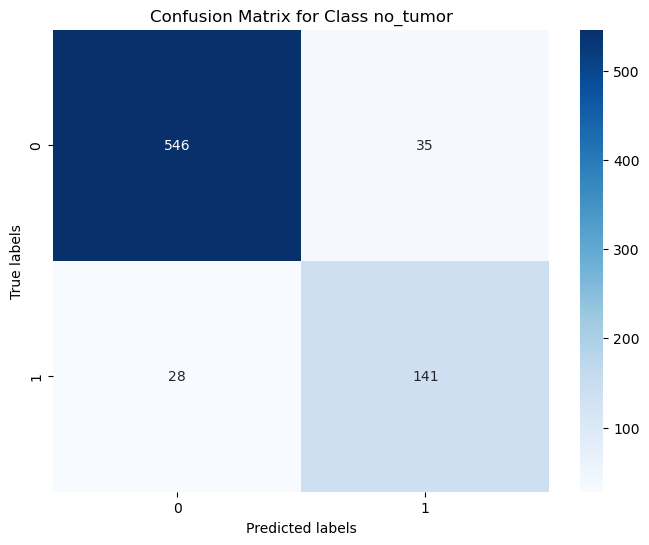

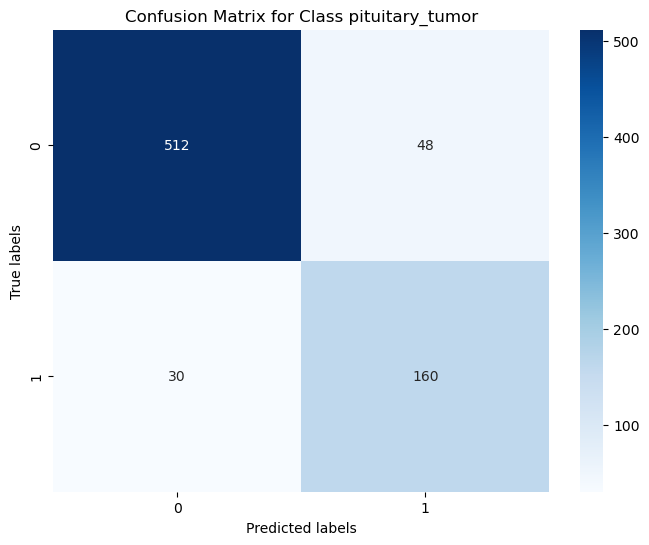

In [ ]:
# Plot confusion matrix
for i, label in enumerate(labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for Class {label}')
    plt.show()

**Discussion:**

* Strengths:
The model performs well in predicting cases with no tumor and pituitary tumors, with high precision and recall.
It achieves good accuracy overall, indicating a solid performance in distinguishing different classes.
* Weaknesses:
The model struggles more with predicting meningioma tumors, where both precision and recall are relatively lower compared to other classes.
Lower precision and recall for meningioma tumors could indicate challenges in correctly identifying this specific tumor type.

In [ ]:
# Evaluate a single example
img = cv2.imread('./brain-tumor-classification-mri/Testing/meningioma_tumor/image(120).jpg')
img = cv2.resize(img, (200, 200))
img_array = np.array(img) / 255.0

In [ ]:
img_array = img_array.reshape(1, 200, 200, 3)

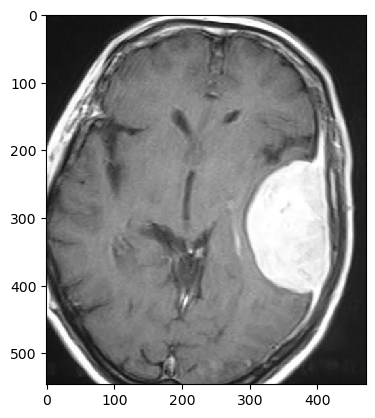

In [ ]:
img = image.load_img('./brain-tumor-classification-mri/Testing/meningioma_tumor/image(120).jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
indices = a.argmax()

1/1 [==============================] - 0s 73ms/step


In [ ]:
print("Predicted Class:", class_names[indices])

Predicted Class: meningioma_tumor


# Conclusion
----
---

This project demonstrates the potential of deep learning in automating the classification of brain tumors. The implemented CNN model achieves high accuracy and can assist medical professionals in diagnostics. Future work could explore the integration of more advanced techniques and larger datasets to further enhance performance.

---


# References
----
----

1.  S. Pereira, A. Pinto, V. Alves, and C. A. Silva, "Brain Tumor Segmentation Using Convolutional Neural Networks in MRI Images," IEEE Transactions on Medical Imaging, vol. 35, no. 5, pp. 1-1, March 2016. doi: 10.1109/TMI.2016.2538465.
2. Mathivanan, S. K., Sonaimuthu, S., Murugesan, S., Rajadurai, H., Shivahare, B. D., & Shah, M. A. (2024). Employing deep learning and transfer learning for accurate brain tumor detection. Scientific Reports, 14, Article number: 7232. https://doi.org/10.1038/s41598-024-7232-9
3. Sangeetha C., Shahin A. "Brain tumor segmentation using artificial neural network." International Research Journal of Engineering and Technology (IRJET), vol. 2, no. 4, pp. 728-734, July 2015, doi:10.15680/IRJET.2015.0204017.
4. Ahmed H, Michael DO, Samaila B. Current challenges of the state-of-the-art of AI techniques for diagnosing brain tumor. Material Sci & Eng. 2023;7(4):196-208.
5. S. Bhuvaji, "Brain Tumor Classification MRI," 2020. [Online]. Available: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

----

In [ ]:
model.save('braintumor.h5')